In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [3]:
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)

X = (inputs-mu) / sigma
X = np.hstack((np.ones((targets.size,1)),X))
print(X.shape)

(15, 4)


In [7]:
rg = np.random.default_rng(15)
w = rg.random((1, 4))
print(w)

[[0.69274337 0.81581711 0.34440676 0.04483818]]


In [5]:
def mse(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [8]:
def model(x,w):
    return x @ w.T

preds = model(X,w)
cost_initial = mse(preds, targets)
print("Cost before regression is : ", cost_initial)

Cost before regression is :  6887.141532489184


In [10]:
def gradient_descent(X, y, w, learning_rate, n_iters):
    history = np.zeros((n_iters, 1))
    for i in range(n_iters):
        h = model(X, w)
        diff = h - y
        delta = (learning_rate / targets.size) * (X.T@diff)
        new_w = w - delta.T
        w = new_w
        history[i] = mse(h, y)
    return (history, w)

In [12]:
n_iters = 250
learning_rate = 0.01

initial_cost = mse(model(X, w),targets)

print("intial cost is: ", initial_cost, "\n")

(history, optimal_params) = gradient_descent(X, targets, w, learning_rate, n_iters)

print("optimal parameters are: \n", optimal_params, "\n")

print("final cost is: ", history[-1])

intial cost is:  6887.141532489184 

optimal parameters are: 
 [[70.07949388 -4.7960194  21.59222949 12.27859736]] 

final cost is:  [48.88238057]


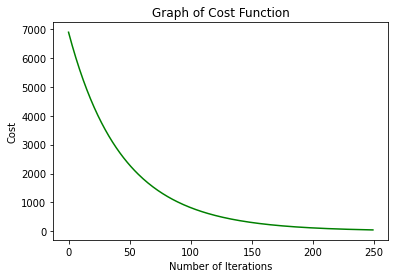

In [14]:
plt.plot(range(len(history)), history, 'g')

plt.title("Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [15]:
preds = model(X, optimal_params)
cost_final = mse(preds, targets)

print("Prediction:\n",preds)
print("Targets:\n", targets)

Prediction:
 [[ 50.19847609]
 [ 78.59035344]
 [106.9723644 ]
 [ 15.7185604 ]
 [ 98.9177151 ]
 [ 50.19847609]
 [ 78.59035344]
 [106.9723644 ]
 [ 15.7185604 ]
 [ 98.9177151 ]
 [ 50.19847609]
 [ 78.59035344]
 [106.9723644 ]
 [ 15.7185604 ]
 [ 98.9177151 ]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [16]:
print("Cost after linear regression: ", cost_final)
print("Cost reduction : {} %".format(((cost_initial- cost_final) / cost_initial) * 100))

Cost after linear regression:  48.0499255559876
Cost reduction : 99.30232411619075 %
